 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [114]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline


# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [160]:
# Reading whale returns
    # Path("../resources/whale_returns.csv") does not work for some reason and everything is saved as it should
whale_returns = Path("/Users/davidkratzer/documents/fintech/challenges/challenge4/resources/whale_returns.csv")
whale_returns_df = pd.read_csv(whale_returns, index_col="Date", parse_dates=True)
whale_returns_df.sort_index(ascending = True, inplace = True)
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [156]:
# Count nulls
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [143]:
# Drop nulls
whale_returns_df.dropna(inplace=True)
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [159]:
# Reading algorithmic returns
algo_returns = Path("/Users/davidkratzer/documents/fintech/challenges/challenge4/resources/algo_returns.csv")
algo_returns_df = pd.read_csv(algo_returns, index_col="Date", parse_dates=True)
algo_returns_df.sort_index(ascending = True, inplace = True)
algo_returns_df.head(100)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2014-10-10,-0.012612,-0.011752
2014-10-13,-0.018528,-0.002009
2014-10-14,0.000702,0.004501


In [119]:
# Count nulls
algo_returns_df.isnull().sum()

Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [145]:
# Drop nulls
algo_returns_df.dropna(inplace=True)
algo_returns_df

,Date,Algo 1,Algo 2
6,2014-06-05,0.004062,0.013285
7,2014-06-06,0.001857,0.008284
8,2014-06-09,-0.005012,0.005668
9,2014-06-10,0.004406,-0.000735
10,2014-06-11,0.004760,-0.003761
...,...,...,...
1236,2019-04-25,0.000682,-0.007247
1237,2019-04-26,0.002981,0.005256
1238,2019-04-29,0.005208,0.002829
1239,2019-04-30,-0.002944,-0.001570


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [147]:
# Reading S&P 500 Closing Prices
    # Path("../resources/sp500_history.csv") does not work for some reason and everything is saved as it should
sp500_history = Path("/Users/davidkratzer/documents/fintech/challenges/challenge4/resources/sp500_history.csv")
sp500_history = pd.read_csv(sp500_history, index_col="Date", parse_dates=True)
sp500_history.sort_index(ascending = True, inplace = True)
sp500_history.head()

/var/folders/_3/lcz201ts0lnd2525vhzwj1r80000gn/T/ipykernel_68430/1448679254.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sp500_history = pd.read_csv(sp500_history, index_col="Date", parse_dates=True)


,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [122]:
# Check Data Types
sp500_history.dtypes

Close    object
dtype: object

In [162]:
# Fix Data Types
sp500_history['Close'] = sp500_history['Close'].str.replace(',','')
sp500_history['Close'] = sp500_history['Close'].str.replace('$','')
#convert close column to float
sp500_history['Close'] = sp500_history['Close'].astype(float)
#check data types after conversion
sp500_history.dtypes

Close    float64
dtype: object

In [161]:
# Calculate Daily Returns
sp500_daily_returns = sp500_history["Close"].pct_change()
sp500_daily_returns.head()

TypeError: unsupported operand type(s) for /: 'str' and 'str'

In [125]:
# Drop nulls
sp500_daily_returns.dropna(inplace=True)
sp500_daily_returns.head()

Date
2019-04-22   -0.008764
2019-04-18   -0.001011
2019-04-17   -0.001577
2019-04-16    0.002279
2019-04-15   -0.000509
Name: Close, dtype: float64

In [165]:
# Rename `Close` Column to be specific to this portfolio.
sp500_history.rename(columns={'Close' : 'SP500_Close'},inplace=True)
#check the dataframe to verify column has been renamed
sp500_history.head()

,SP500_Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


## Combine Whale, Algorithmic, and S&P 500 Returns

In [167]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.

combined_df = pd.concat([whale_returns_df, algo_returns_df, sp500_daily_returns],axis="columns")

combined_df.rename(columns={'Close' : 'SP500_Close'},inplace=True)

---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: xlabel='Date'>

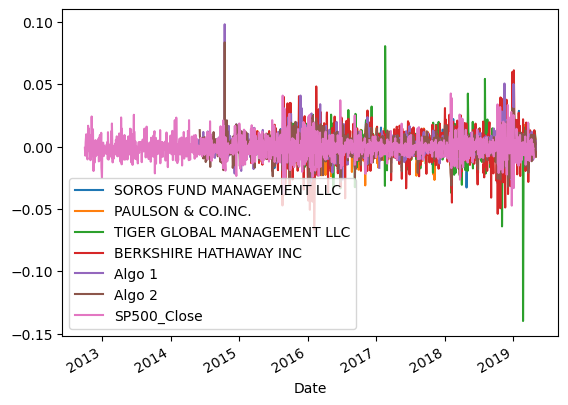

In [168]:
# Plot daily returns of all portfolios
combined_df.plot()

#### Calculate and Plot cumulative returns.

<Axes: xlabel='Date'>

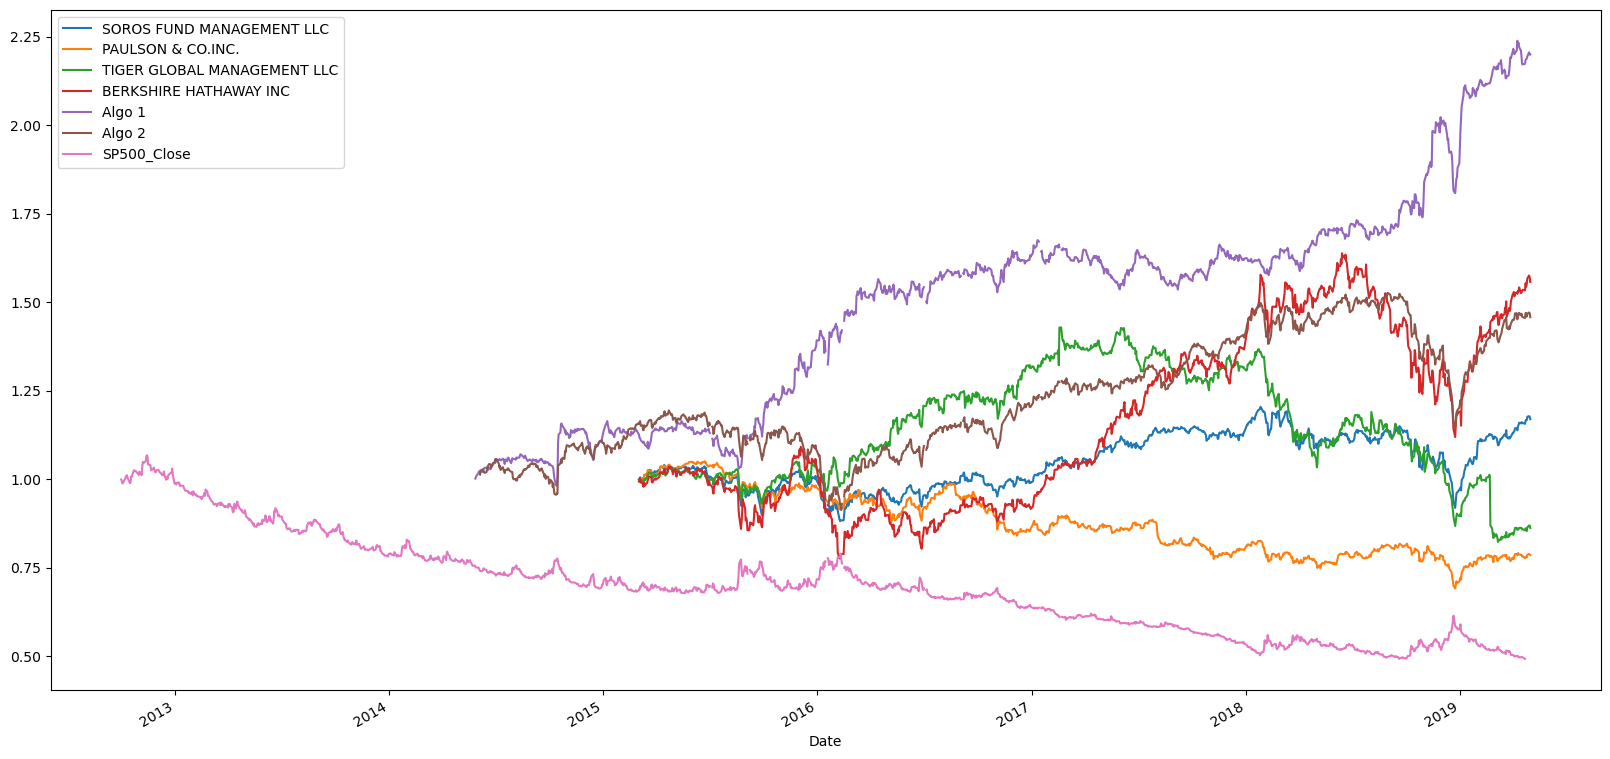

In [169]:
# Calculate cumulative returns of all portfolios
df_cum = (1+ combined_df).cumprod()
df_cum.plot(figsize = (20,10))


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<Axes: >

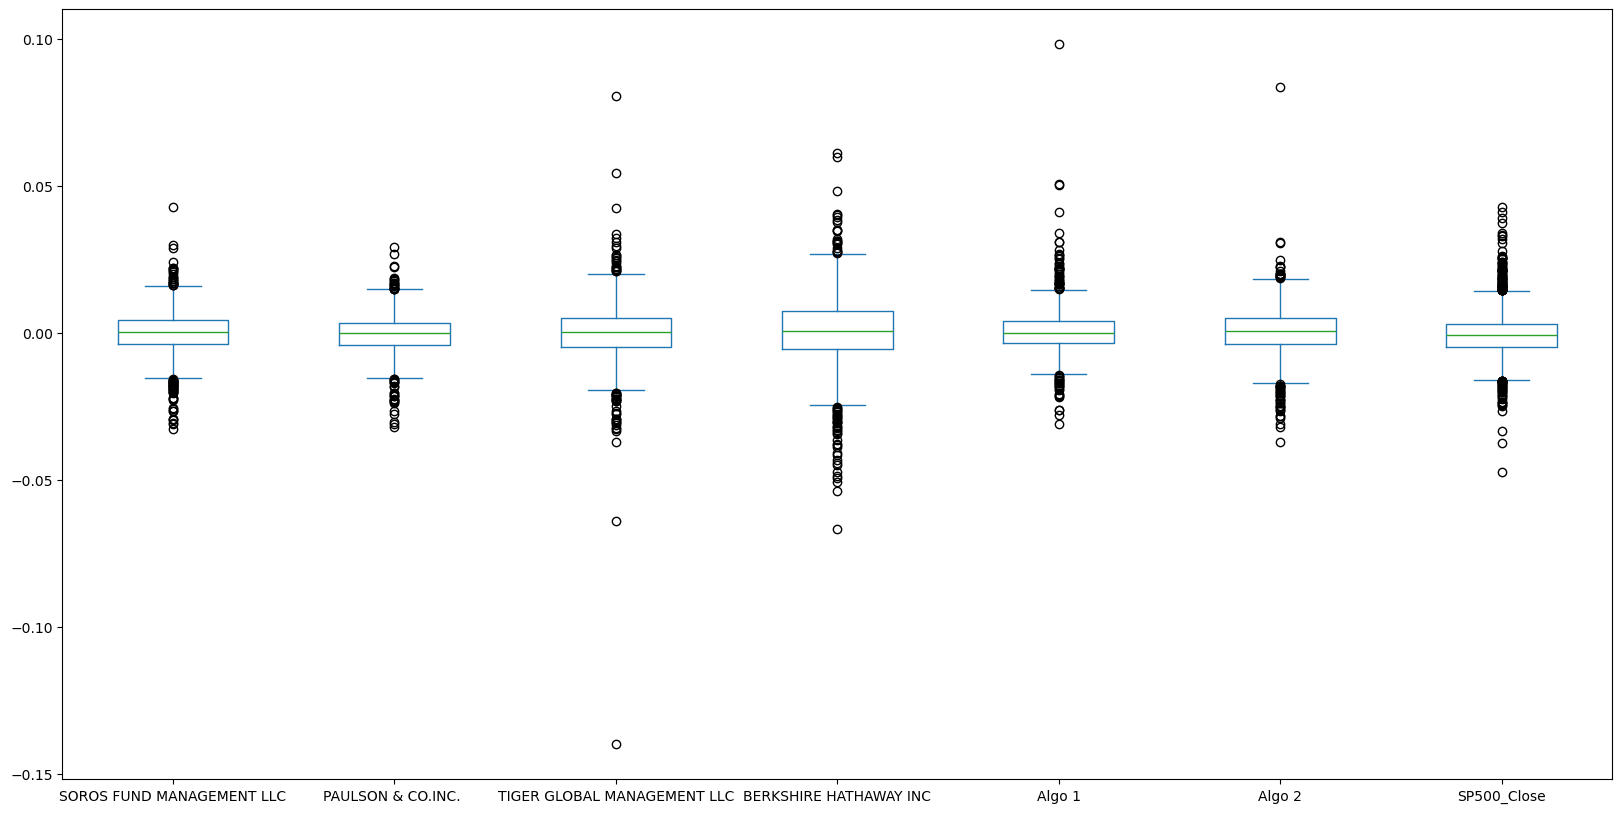

In [170]:
# Box plot to visually show risk
combined_df.plot(kind = "box", figsize = (20,10))

### Calculate Standard Deviations

In [171]:
# Calculate the daily standard deviations of all portfolios
combined_df_std = pd.DataFrame(combined_df.std()).rename(columns = {0:"std"})
combined_df_std

,std
SOROS FUND MANAGEMENT LLC,0.007842
PAULSON & CO.INC.,0.006977
TIGER GLOBAL MANAGEMENT LLC,0.010824
BERKSHIRE HATHAWAY INC,0.012831
Algo 1,0.007972
Algo 2,0.008466
SP500_Close,0.008135


### Determine which portfolios are riskier than the S&P 500

In [174]:
# Calculate  the daily standard deviation of S&P 500
#This is shown above

# Determine which portfolios are riskier than the S&P 500
higher_std = combined_df_std[combined_df_std["std"] > combined_df_std.loc["SP500_Close", "std"]]
higher_std

,std
TIGER GLOBAL MANAGEMENT LLC,0.010824
BERKSHIRE HATHAWAY INC,0.012831
Algo 2,0.008466


### Calculate the Annualized Standard Deviation

In [175]:
# Calculate the annualized standard deviation (252 trading days)
df_annualized_std = combined_df_std*np.sqrt(252)
df_annualized_std

,std
SOROS FUND MANAGEMENT LLC,0.124487
PAULSON & CO.INC.,0.110754
TIGER GLOBAL MANAGEMENT LLC,0.171830
BERKSHIRE HATHAWAY INC,0.203682
Algo 1,0.126558
Algo 2,0.134401
SP500_Close,0.129133


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: xlabel='Date'>

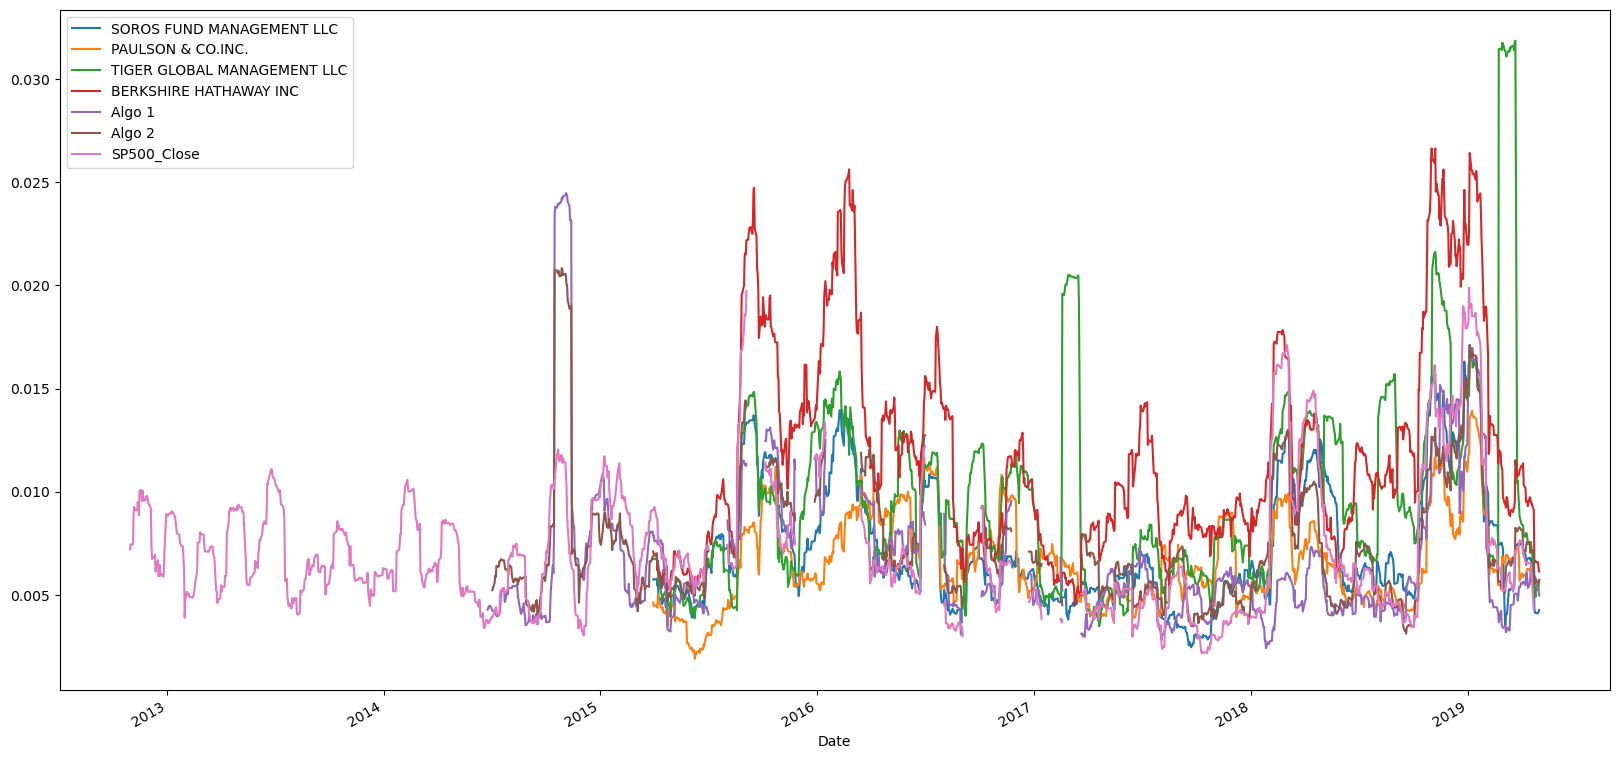

In [176]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_21 = combined_df.rolling(window = 21).std()

# Plot the rolling standard deviation
rolling_21.plot(figsize = (20,10))

### Calculate and plot the correlation

In [240]:
# Calculate the correlation
correlation = pd.DataFrame(combined_df.corr())
# Display de correlation matrix
correlation[correlation==correlation[correlation<1].max()]

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500_Close
SOROS FUND MANAGEMENT LLC,NaN,0.700181,0.561745,0.754308,NaN,0.826719,NaN
PAULSON & CO.INC.,NaN,NaN,NaN,NaN,NaN,NaN,0.013549
TIGER GLOBAL MANAGEMENT LLC,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BERKSHIRE HATHAWAY INC,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Algo 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Algo 2,0.826719,NaN,NaN,NaN,0.346568,NaN,NaN
SP500_Close,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<Axes: title={'center': 'Rolling 60-Day Beta of BH'}, xlabel='Date'>

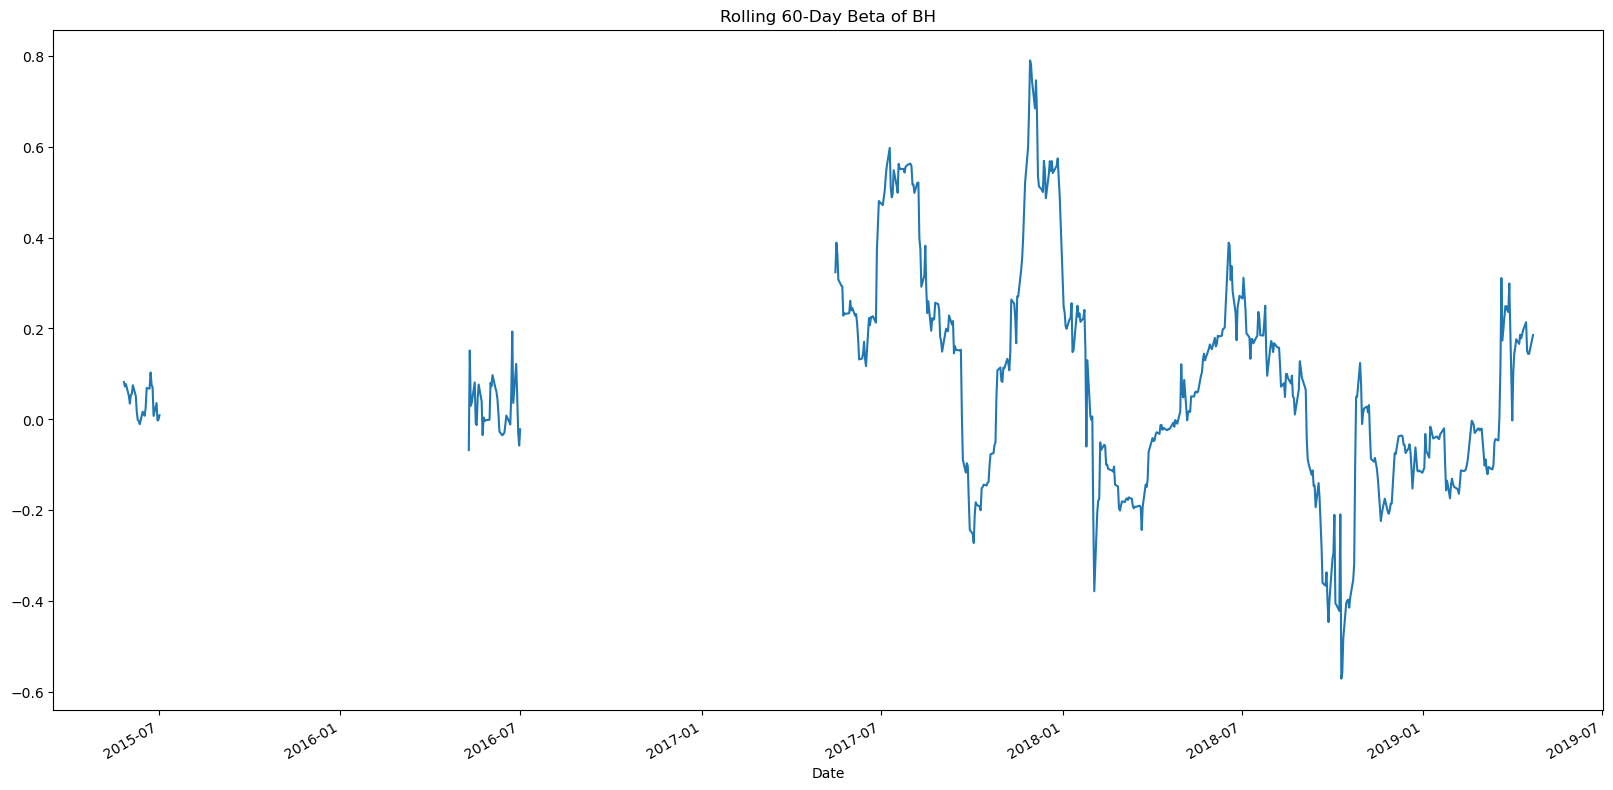

In [180]:
# Calculate covariance of a single portfolio
rolling_covariance = combined_df['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(combined_df['SP500_Close'])
# Calculate variance of S&P 500
rolling_variance = combined_df['SP500_Close'].rolling(window=60).var()
# Computing beta
rolling_beta = rolling_covariance / rolling_variance
# Plot beta trend
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of BH')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<Axes: xlabel='Date'>

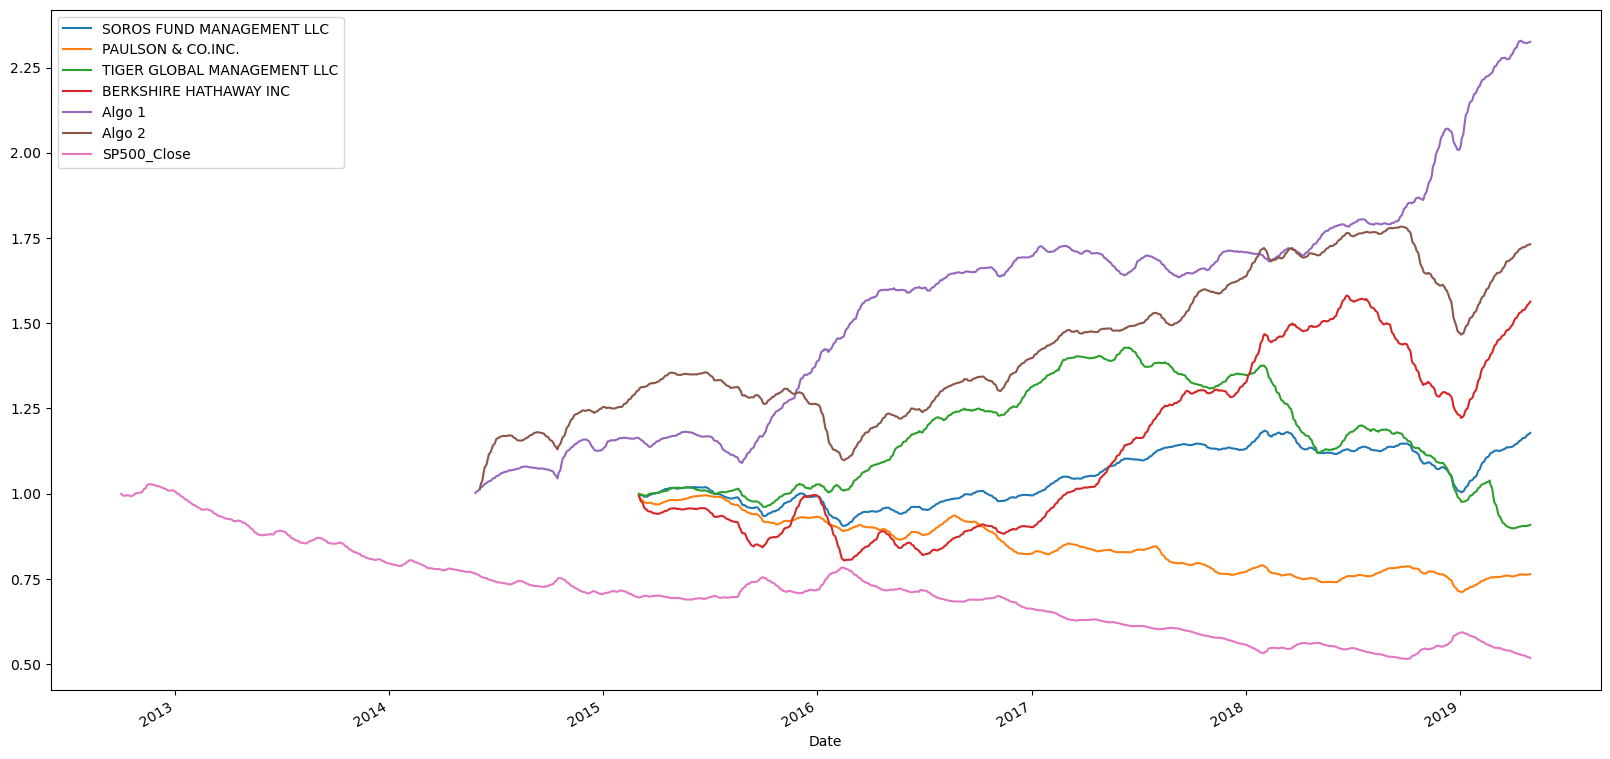

In [181]:
# Use `ewm` to calculate the rolling window
combined_df_ewm = combined_df.ewm(span = 21,adjust = False).mean()
(1+combined_df_ewm).cumprod().plot(figsize = (20,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [182]:
# Annualized Sharpe Ratios
sharpe_ratios = combined_df.mean()*252/(combined_df.std()*np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.361568
PAULSON & CO.INC.             -0.462131
TIGER GLOBAL MANAGEMENT LLC   -0.118257
BERKSHIRE HATHAWAY INC         0.619628
Algo 1                         1.327397
Algo 2                         0.639258
SP500_Close                   -0.774405
dtype: float64

<Axes: title={'center': 'Sharpe Ratios'}>

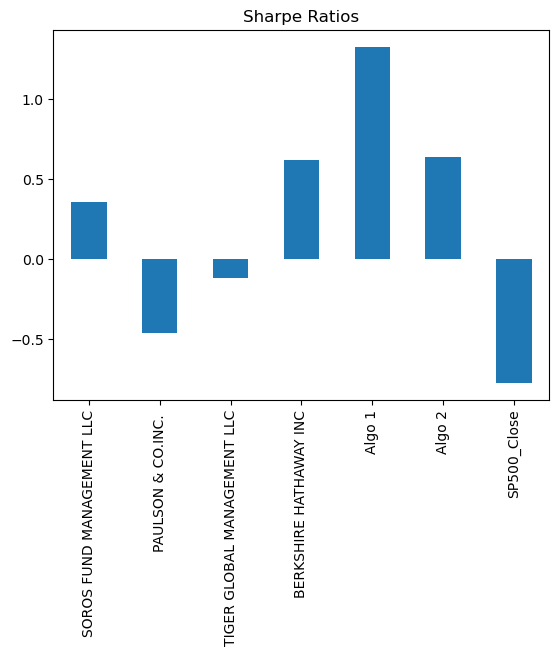

In [183]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = "bar", title = "Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

# Algo 1 and algo 2 outperformed the market and the whales. 

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [200]:
# Reading data from 1st stock
aapl_history = Path("/Users/davidkratzer/documents/fintech/challenges/challenge4/resources/aapl_historical.csv")
aapl_history = pd.read_csv(aapl_history, index_col="Trade DATE", parse_dates=True)
aapl_history.rename(columns = {"NOCP":"Apple"}, inplace = True)
aapl_history.head()

,Symbol,Apple
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [199]:
# Reading data from 2nd stock
cost_history = Path("/Users/davidkratzer/documents/fintech/challenges/challenge4/resources/cost_historical.csv")
cost_history = pd.read_csv(cost_history, index_col="Trade DATE", parse_dates=True)
cost_history.rename(columns = {"NOCP":"Costco"}, inplace = True)
cost_history.head()

,Symbol,Costco
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62


In [198]:
# Reading data from 3rd stock
goog_history = Path("/Users/davidkratzer/documents/fintech/challenges/challenge4/resources/goog_historical.csv")
goog_history = pd.read_csv(goog_history, index_col="Trade DATE", parse_dates=True)
goog_history.rename(columns = {"NOCP":"Google"}, inplace = True)
goog_history.head()

,Symbol,Google
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [227]:
# Combine all stocks in a single DataFrame
combined_stocks = pd.concat((aapl_history, cost_history, goog_history), axis = 1, join="inner")
combined_stocks.sort_index(ascending = True, inplace = True)
combined_stocks.head()

,Symbol,Apple,Symbol,Costco,Symbol,Google
Trade DATE,,,,,,
2018-05-11,AAPL,188.59,COST,195.76,GOOG,1098.26
2018-05-14,AAPL,188.15,COST,195.88,GOOG,1100.20
2018-05-15,AAPL,186.44,COST,195.48,GOOG,1079.23
2018-05-16,AAPL,188.18,COST,198.71,GOOG,1081.77
2018-05-17,AAPL,186.99,COST,199.60,GOOG,1078.59


In [229]:
# Reset Date index
# Reset the index
combined_stocks.index = combined_stocks.index.normalize()

In [231]:
# Reorganize portfolio data by having a column per symbol

combined_stocks = combined_stocks.drop(columns=['Symbol'])
combined_stocks.head()

,Apple,Costco,Google
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [233]:
# Calculate daily returns
combined_stocks_returns = combined_stocks.pct_change()
combined_stocks_returns.head()

,Apple,Costco,Google
Trade DATE,,,
2018-05-11,NaN,NaN,NaN
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940


In [234]:
# Drop NAs
combined_stocks_returns.dropna(inplace=True)
# Display sample data
combined_stocks_returns.head()

,Apple,Costco,Google
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [235]:
# Set weights
weights = [1/3, 1/3, 1/3]
weighted_portfolio = combined_stocks.dot(weights)
# Calculate portfolio return
portfolio_returns = weighted_portfolio.pct_change()
portfolio_returns.dropna(inplace = True)
# Display sample data
portfolio_returns.head()

Trade DATE
2018-05-14    0.001093
2018-05-15   -0.015550
2018-05-16    0.005140
2018-05-17   -0.002370
2018-05-18   -0.009248
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [236]:
# Join your returns DataFrame to the original returns DataFrame
portfolio_returns_all = pd.concat((portfolio_returns,combined_df), axis = 1, join = "inner")
portfolio_returns_all.rename(columns = {0:"my_portfolio"}, inplace = True)
portfolio_returns_all

,my_portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500_Close
2018-05-14,0.001093,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889
2018-05-15,-0.015550,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044
2018-05-16,0.005140,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857
2018-05-17,-0.002370,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639
2018-05-18,-0.009248,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.007333
...,...,...,...,...,...,...,...,...
2019-04-25,0.001876,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,NaN
2019-04-26,0.003482,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,NaN
2019-04-29,0.009400,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,NaN
2019-04-30,-0.058619,-0.001295,-0.002211,-0.000259,-0.003702,-0.002944,-0.001570,NaN


In [237]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
portfolio_returns_all.dropna(inplace=True)
portfolio_returns_all

,my_portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500_Close
2018-05-14,0.001093,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889
2018-05-15,-0.015550,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044
2018-05-16,0.005140,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857
2018-05-17,-0.002370,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639
2018-05-18,-0.009248,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.007333
...,...,...,...,...,...,...,...,...
2019-04-15,0.004805,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.003036,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,0.007962,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577
2019-04-18,0.000599,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [238]:
# Calculate the annualized `std`
portfolio_all_std = pd.DataFrame(portfolio_returns_all.std()).rename(columns = {0:"std"})
portfolio_all_std

,std
my_portfolio,0.014424
SOROS FUND MANAGEMENT LLC,0.009248
PAULSON & CO.INC.,0.007366
TIGER GLOBAL MANAGEMENT LLC,0.014671
BERKSHIRE HATHAWAY INC,0.015579
Algo 1,0.008437
Algo 2,0.008788
SP500_Close,0.009605


### Calculate and plot rolling `std` with 21-day window

<Axes: >

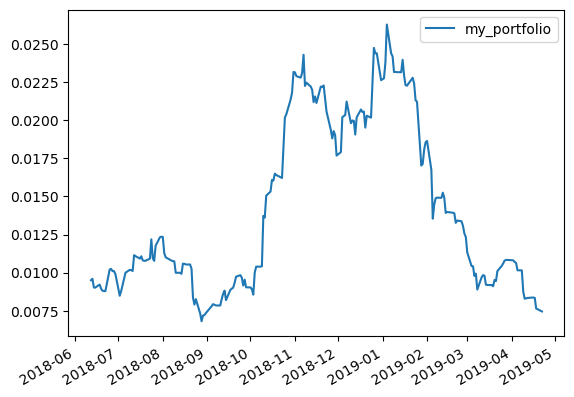

In [239]:
# Calculate rolling standard deviation
portfolio_rolling_21 = portfolio_returns_all[["my_portfolio"]].rolling(window = 21).std()
# Plot rolling standard deviation
portfolio_rolling_21.plot()

### Calculate and plot the correlation

In [241]:
# Calculate and plot the correlation

correlation_all = pd.DataFrame(portfolio_returns_all.corr())
# Display de correlation matrix
correlation_all[correlation==correlation[correlation<1].max()]

,my_portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500_Close
my_portfolio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SOROS FUND MANAGEMENT LLC,NaN,NaN,0.791802,0.477844,0.816197,NaN,0.862583,NaN
PAULSON & CO.INC.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.059862
TIGER GLOBAL MANAGEMENT LLC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BERKSHIRE HATHAWAY INC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Algo 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Algo 2,NaN,0.862583,NaN,NaN,NaN,0.364457,NaN,NaN
SP500_Close,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<Axes: title={'center': 'Rolling 60-Day Beta of my portfolio'}>

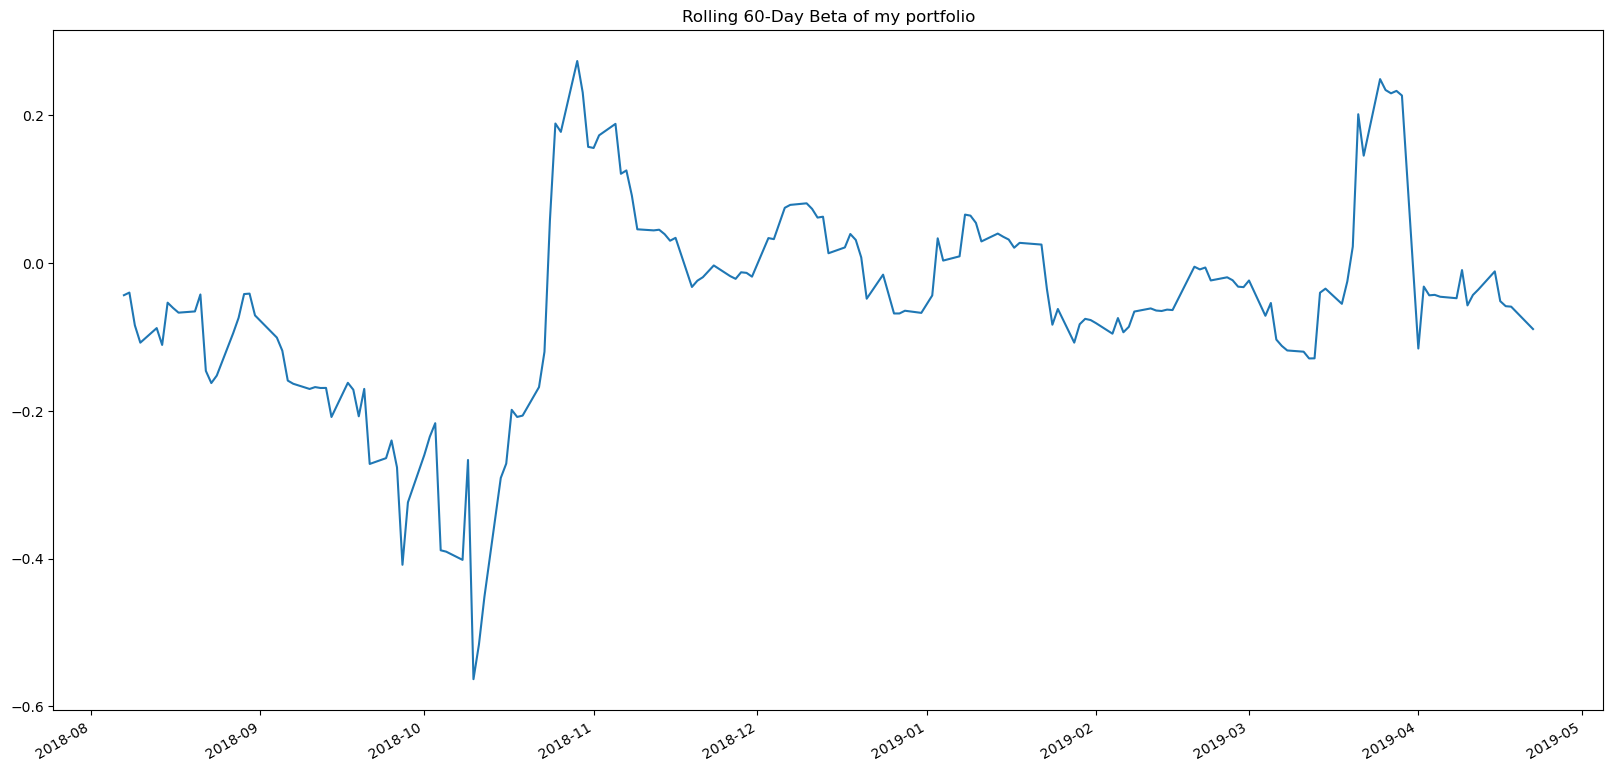

In [243]:
# Calculate and plot Beta
rolling_covariance = portfolio_returns_all['my_portfolio'].rolling(window=60).cov(portfolio_returns_all['SP500_Close'])
rolling_variance = portfolio_returns_all['SP500_Close'].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of my portfolio')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [245]:
# Calculate Annualized Sharpe Ratios
trading_days = portfolio_returns_all.count()
sharpe_ratios = portfolio_returns_all.mean()*trading_days/(portfolio_returns_all.std()*np.sqrt(trading_days))

<Axes: title={'center': 'sharpe ratios'}>

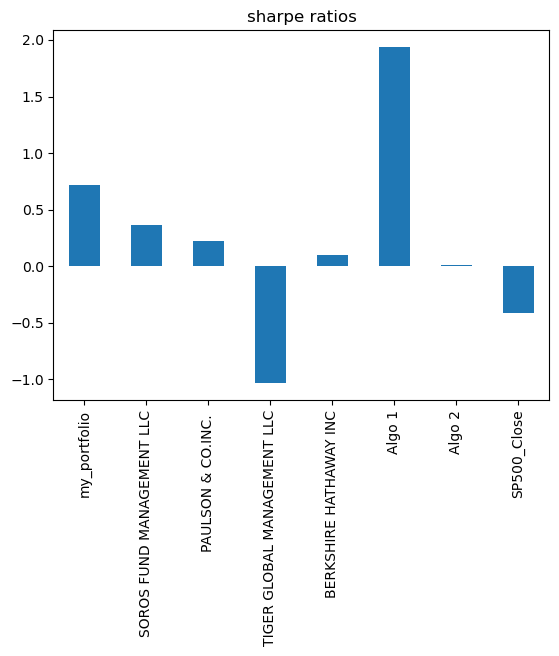

In [246]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = 'bar', title = "sharpe ratios")

### How does your portfolio do?

Write your answer here!

In [249]:
#Final thoughts
print("My portfolio of Apple, Costco, and Google does very well compared to the whales, but does not beat Algo 1.")

My portfolio of Apple, Costco, and Google does very well compared to the whales, but does not beat Algo 1.
